## ML implementation    

In [58]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [123]:
df_proc_3 = pd.read_csv('Twitter_Processed3.csv')
df_proc_2 = pd.read_csv('Twitter_Processed2.csv')
df_names3 = pd.read_csv('Name_id_list3.csv')
df_names2 = pd.read_csv('Name_id_list2.csv')

In [130]:
df_proc_3[df_proc_3['Language'] == 'da' ]
df_proc_3['Tweet Processed']

# df_names

0        ['opgør', 'ekstremt', 'kønsopdelte', 'uddannel...
1        ['undrer', 'ministeren', 'deltog', '#ligestill...
2                                                       []
3        ['gerne', 'mere', 'ledelse', 'gerne', 'mindre'...
4        ['takker', 'stærke', 'kvinder', 'mænd', 'kæmpe...
                               ...                        
22864    ['pendler', 'gerne', 'god', 'arbejdsplads', 't...
22865    ['god', 'brølt', 'amalie', 'lyhne', 'politiker...
22866    ['østrig', 'flygtningekaos', 'skaber', 'opdelt...
22867    ['mon', 'hold', 'truslen', 'df', 'agt', 'magt'...
22868    ['sikrer', 'karakterer', 'social', 'mobilitet'...
Name: Tweet Processed, Length: 22869, dtype: object

In [46]:
fatma_tweets = df_proc_3[df_proc_3['Name'] == 'Fatma Øktem']
fatma_info = df_names[df_names['Name'] == 'Fatma Øktem']
fatma_tweets

In [49]:
# merging tweets on persons
def merge_df(df_name,df_twitter):
    # Merge on names
    df_new = pd.merge(df_name,df_twitter[['Date','Name', 'Tweet Processed', 'Language']],  how='left', on=['Name'])
    
    # df_new['Twitter_id'] = df_new['Twitter_id'].fillna(df_new1['Twitter_id'])
    # df_new['Følgere'] = df_new['Følgere'].fillna(df_new1['Følgere'])

    # We will still miss a few Twitter_id (human error or no twitter account)
    # df_new.replace(float('NaN'),'None',inplace=True)

    return df_new



In [139]:
# df_info = merge_df(df_Name,df_Twitter_id)
# twitter_missing = len(df_info.loc[df_info['Twitter_id'] == 'None'])
# print ('We are missing: '+ str(twitter_missing) + ' twitter accounts')
df_fatma = merge_df(fatma_info, fatma_tweets)
# df_fatma

df_test = merge_df(df_names3, df_proc_3)
df_test2 = merge_df(df_names2, df_proc_2)

df_model = pd.concat([df_test2, df_test])
df_model.reset_index(inplace=True)
df_model = df_model.drop(['index', 'Unnamed: 0'], axis=1)
# df_model['final_text'] = np.nan
# for i in range(len(df_model['Tweet Processed'])):
#     df_model['final_text'][i] = df_model['Tweet Processed'][i]
# df_model['Tweet Processed'][0]


In [ ]:
# Har vi husket alle disse?

# nltk.download('stopwords')
# stemmer = PorterStemmer()
# words = stopwords.words("english")
# dataset['cleaned'] = dataset['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

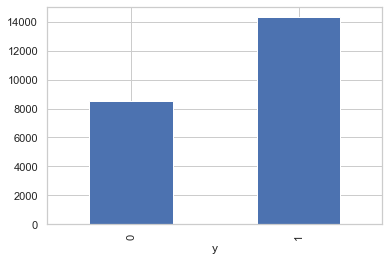

In [61]:
# df_test.groupby('y').mean()

df_test.groupby('y')['Tweet Processed'].count().plot.bar(ylim=0)
plt.show()

In [67]:
df_test_da = df_test[df_test['Language'] != 'en']
df_test_da

(21532, 21530)

In [85]:
vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1, 2), max_features=10000)
final_features = vectorizer.fit_transform(df_test_da['Tweet Processed']).toarray()
final_features.shape

(22578, 10000)

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df_test_da['Tweet Processed'] 
Y = df_test_da['y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', LogisticRegression(random_state=1, penalty='l1', solver='liblinear'))])

model = pipeline.fit(X_train, y_train)
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

In [131]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
# from tqdm import tqdm
import matplotlib.pyplot as plt

In [141]:
df_model_da = df_model[df_model['Language'] == 'da']

X = df_model_da['Tweet Processed'] 
Y = df_model_da['y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [146]:
vect = CountVectorizer(ngram_range=(1,1))
X = vect.fit_transform(X_train)
penalty = 'l1'

mlogit = LogisticRegression(random_state=1, penalty=penalty, solver='liblinear').fit(X_train, y_train)

ValueError: could not convert string to float: "['dybt', 'pinligt', 'stenrige', 'militært', 'veludrustede', 'europæiske', 'lande', 'evner', 'passe', 'egne', 'grænser', 'måske', 'pågældende', 'landes', 'politistyrker', 'komme', 'ekstrauddannelse', 'ungarn', 'præcist', 'ved', 'hvordan', 'passer', 'grænser']"